# Importing the datasets

In [1]:
import bs4 as bs
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetching the data
## Reading data from the source url

In [2]:
source = urllib.request.urlopen(r'https://people.sc.fsu.edu/~jburkardt/datasets/regression/x07.txt').read()

soup = bs.BeautifulSoup(source, 'lxml')

lines = soup.p.contents[0].split('\n')

# Removing the empty lines from the fetched data

In [3]:
try:
    for line in lines[-1::-1]:
        if line == '':
            lines.pop()
except:
    pass

# Creating the dataset

In [7]:
l1 = []
noOfColumns = 0
noOfRows = 0
for line in lines:
  
    if line[0] == '#':    # avoiding all the lines stating with '#' character
        print(line)
        continue

    if line[0] != '#' and (noOfColumns==0 or noOfRows==0):    # fetching the number of rows and columns
        datalist = line.split(' ')

        if datalist[1] == 'columns':
            noOfColumns = int(datalist[0])
            col = 0

        elif datalist[1] == 'rows':
            noOfRows = int(datalist[0])
            row = 0

    elif line[0] != '#' and noOfColumns>0 and noOfRows>0:    # fetfching all the rows and columns in 1-dimentional array as a list
        datalist = line.strip().split()

        if col<noOfColumns:
            l1.append(' '.join(datalist))
            col += 1

        elif row<noOfRows:
            l1 += datalist
            row += 1
            
dataset = np.array([l1]).reshape((noOfRows+1,noOfColumns))    # Creating the dataset from the of shape(rows, columns) from the 1-D array with the coumns headers


#  x07.txt
#
#  Reference:
#
#    D G Kleinbaum and L L Kupper,
#    Applied Regression Analysis and Other Multivariable Methods,
#    Duxbury Press, 1978, page 148.
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991,
#    ISBN 0-12-656460-4.
#
#  Discussion:
#
#    A psychiatrist assigns values for mental retardation and 
#    degree of distrust of doctors in 53 newly hospitalized patients.
#    Six months later, a value for the degree of illness of each patient
#    is assigned.  The question is whether the effect of treatment can
#    be related to these indices.  Since the independent and dependent
#    variables are essentially subjective, it is assumed that large
#    errors are made in all of them.
#
#    There are 53 rows of data.  The data comprises:
#
#      I,  the index;
#      A1, the degree of mental retardation;
#      A2, the degree of distrust of doctors;
#      B,  the degree of illness.
#
#    We seek a model of the fo

## Printing the Dataset

In [8]:
print(dataset)

[['Index' 'Retardation Index' 'Distrust Index'
  'Degree of Illness after 6 Months']
 ['1' '2.80' '6.1' '44']
 ['2' '3.10' '5.1' '25']
 ['3' '2.59' '6.0' '10']
 ['4' '3.36' '6.9' '28']
 ['5' '2.80' '7.0' '25']
 ['6' '3.35' '5.6' '72']
 ['7' '2.99' '6.3' '45']
 ['8' '2.99' '7.2' '25']
 ['9' '2.92' '6.9' '12']
 ['10' '3.23' '6.5' '24']
 ['11' '3.37' '6.8' '46']
 ['12' '2.72' '6.6' '8']
 ['13' '3.47' '8.4' '15']
 ['14' '2.70' '5.9' '28']
 ['15' '3.24' '6.0' '26']
 ['16' '2.65' '6.0' '27']
 ['17' '3.41' '7.6' '4']
 ['18' '2.58' '6.2' '14']
 ['19' '2.81' '6.0' '21']
 ['20' '2.80' '6.4' '22']
 ['21' '3.62' '6.8' '60']
 ['22' '2.74' '8.4' '10']
 ['23' '3.27' '6.7' '60']
 ['24' '3.78' '8.3' '12']
 ['25' '2.90' '5.6' '28']
 ['26' '3.70' '7.3' '39']
 ['27' '3.40' '7.0' '14']
 ['28' '2.63' '6.9' '8']
 ['29' '2.65' '5.8' '11']
 ['30' '3.26' '7.2' '7']
 ['31' '3.15' '6.5' '23']
 ['32' '2.60' '6.3' '16']
 ['33' '2.74' '6.8' '26']
 ['34' '2.72' '5.9' '8']
 ['35' '3.11' '6.8' '11']
 ['36' '2.79' '6.7'

# Pre-processing of data
## creating a pandas dataframe

In [9]:
df = pd.DataFrame(data=dataset[1:,1:],    # selecting all the rows and columns starting from 1st index location i.e. 2nd row and 2nd column as the data
                 index=dataset[1:,0],     # 1st column of the dataset is the index and the rows starting from 1st index location
                 columns=dataset[0,1:],   # ist row of the dataset is the column names it's the 0th row of the dataset
                 dtype = 'float64')

## let's have a look at the dataframe

In [10]:
print(df)

    Retardation Index  Distrust Index  Degree of Illness after 6 Months
1                2.80             6.1                              44.0
2                3.10             5.1                              25.0
3                2.59             6.0                              10.0
4                3.36             6.9                              28.0
5                2.80             7.0                              25.0
6                3.35             5.6                              72.0
7                2.99             6.3                              45.0
8                2.99             7.2                              25.0
9                2.92             6.9                              12.0
10               3.23             6.5                              24.0
11               3.37             6.8                              46.0
12               2.72             6.6                               8.0
13               3.47             8.4                           

## fetching the Independent Variables and Dependent Variable

In [43]:
X = df.iloc[:,:2].values
y = df.iloc[:,2:].values

# splitting the data into training set and testing set

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Since the above data frame contains 2 independent variables therefore the model need to be implemented is multi linear regression
#### the equation of mult linear regression is :
    y = a0 + a1*x1 + a2*x2 + ..... +an*xn
#### the model required in the above the dataset seek to be in the form of:
    y = a1*x1 + a2*x2
#### thereby multi linear regression model hold the above requirement

# Fitting the Multi Linear Regression model to the dataset

In [45]:
from  sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
y_pred = linear_regressor.predict(X_test)

In [47]:
print(y_pred)

[[ 18.19038552]
 [ 22.6140437 ]
 [ 13.63250542]
 [ 20.39068818]
 [ 23.13354361]
 [ 32.10922056]
 [ 15.20233535]
 [ 13.86011617]
 [ 25.84142729]
 [ 15.12066918]
 [ 18.86149511]]


In [48]:
print(y_test)

[[ 22.]
 [ 31.]
 [ 13.]
 [ 15.]
 [ 66.]
 [ 72.]
 [ 14.]
 [ 18.]
 [ 28.]
 [ 26.]
 [ 28.]]


In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.0723654578601
11.6813298019
342.565470091


# Visualising the results
## Visualising the training set results

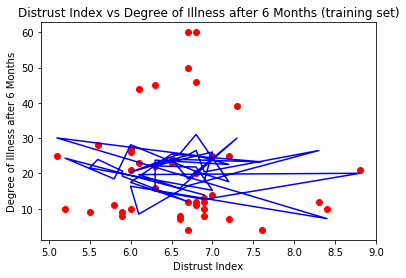

In [50]:
plt.scatter(X_train[:,1], y_train, color='red')
plt.plot(X_train[:,1], linear_regressor.predict(X_train), color='blue')
plt.title('{0} vs {1} (training set)'.format(df.columns[1],df.columns[-1]))
plt.xlabel('{}'.format(df.columns[1]))
plt.ylabel('{}'.format(df.columns[-1]))
plt.show()

## Visualising the test set results 

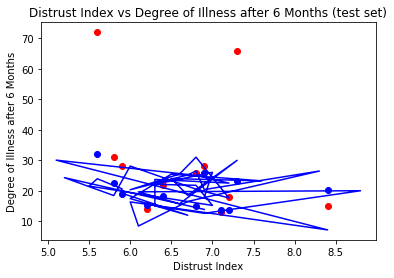

In [51]:
plt.scatter(X_test[:,1], y_test, color='red')
plt.scatter(X_test[:,1], y_pred, color='blue')
plt.plot(X_train[:,1], linear_regressor.predict(X_train), color='blue')
plt.title('{0} vs {1} (test set)'.format(df.columns[1],df.columns[-1]))
plt.xlabel('{}'.format(df.columns[1]))
plt.ylabel('{}'.format(df.columns[-1]))
plt.show()

#### After looking at the description part of the dataset it was given that
#### Since the independent and dependent
#### variables are essentially subjective, it is assumed that large
#### errors are made in all of them.

#### So to achieve this I'll apply the Forward selection method
        Forward selection is kind of stepwise regression 
        their are three types of stewise regression methods, these are:

             1. Forward selection
             2. Backward Elimination
             3. Bidirectional Elimination


        Here I'm going to introduce the Forward selection methods, 

        Forward selection, which involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.
        
        `source: https://en.wikipedia.org/wiki/Stepwise_regression

    Steps include in Forward selection methods are:
    
    STEP 1 : Select the fit criteria 
    STEP 2 : fit the model with the lowest fit criteria 
    STEP 3 : keep this variable and add one more variable to it,
    STEP 4 : choose the one with lowest fit critera 
               if p value < fit critera
               then 
                   got to step3
               otherwise
                   keep the previous model and the model is done
                   

In [25]:
import statsmodels.formula.api as sm
intercept = np.ones((X.shape[0], 1)).astype(int)
X = np.append(arr = intercept, values = X, axis = 1)
X_opt = X[:, [0]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

C:\Users\dp\Anaconda3\envs\py35\lib\site-packages\statsmodels\regression\linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 08 Oct 2019   Prob (F-statistic):                nan
Time:                        07:43:04   Log-Likelihood:                -222.75
No. Observations:                  53   AIC:                             447.5
Df Residuals:                      52   BIC:                             449.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7170      2.244     10.124      0.000      18.214      27.220
==============================================================================
Omnibus:                       17.117   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.052
Skew:                           1.370   Prob(JB):                     4.42e-05
Kurtosis:                       4.255   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X_opt = X[:, [ 1]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

C:\Users\dp\Anaconda3\envs\py35\lib\site-packages\statsmodels\regression\linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 08 Oct 2019   Prob (F-statistic):                nan
Time:                        07:47:32   Log-Likelihood:                -222.75
No. Observations:                  53   AIC:                             447.5
Df Residuals:                      52   BIC:                             449.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7170      2.244     10.124      0.000      18.214      27.220
==============================================================================
Omnibus:                       17.117   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.052
Skew:                           1.370   Prob(JB):                     4.42e-05
Kurtosis:                       4.255   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X_opt = X[:, [ 2]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     116.1
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           7.40e-15
Time:                        07:47:43   Log-Likelihood:                -220.51
No. Observations:                  53   AIC:                             443.0
Df Residuals:                      52   BIC:                             445.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.6961      0.714     10.776      0.000       6.263       9.129
==============================================================================
Omnibus:                       14.607   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.986
Skew:                           1.247   Prob(JB):                     0.000338
Kurtosis:                       4.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Since in third case the p-value tends to zero and R-squared value is coloser to 1 so the second feature (independent variable) is the best candidate or variable for the for the training i.e. Distrust Index


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 42)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
y_pred_2 = linear_regressor_2.predict(X_test)

In [37]:
print(y_pred_2)

[[ 18.22335224]
 [ 19.24136868]
 [ 17.45983991]
 [ 26.74923995]
 [ 24.84045912]
 [ 25.22221529]
 [ 15.42380702]
 [ 17.96884813]
 [ 25.34946734]
 [ 17.45983991]
 [ 16.95083168]]


In [41]:
print(y_test)

[[ 22.]
 [ 31.]
 [ 13.]
 [ 15.]
 [ 66.]
 [ 72.]
 [ 14.]
 [ 18.]
 [ 28.]
 [ 26.]
 [ 28.]]


In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
print(r2_score(y_test, y_pred_2))
print(mean_absolute_error(y_test, y_pred_2))
print(mean_squared_error(y_test, y_pred_2))

-0.0823750413612
13.034227681
399.709473952


# Visualising the results
## Visualising the training set results

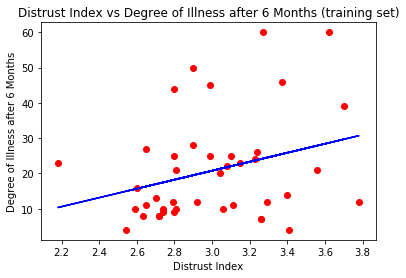

In [39]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, linear_regressor_2.predict(X_train), color='blue')
plt.title('{0} vs {1} (training set)'.format(df.columns[1],df.columns[-1]))
plt.xlabel('{}'.format(df.columns[1]))
plt.ylabel('{}'.format(df.columns[-1]))
plt.show()

## Visualising the test set reuslts 

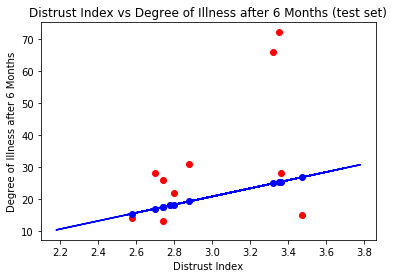

In [40]:
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred_2, color='blue')
plt.plot(X_train, linear_regressor_2.predict(X_train), color='blue')
plt.title('{0} vs {1} (test set)'.format(df.columns[1],df.columns[-1]))
plt.xlabel('{}'.format(df.columns[1]))
plt.ylabel('{}'.format(df.columns[-1]))
plt.show()